### Finding Outiliers to respective ML algorithm
 

In [2]:
import pandas as pd 
import numpy as np
df=pd.read_csv("E:\Edureka\VIDEO LINKS AND USEFUL INFO\Finding And Removing Outliers\Titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [5]:
import matplotlib as pylt
import seaborn as sns

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

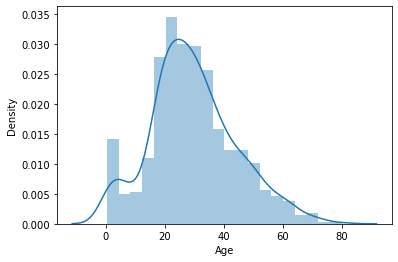

In [6]:
sns.distplot(df['Age'].dropna())

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

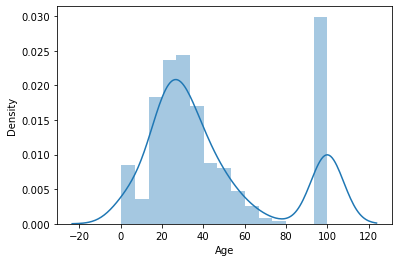

In [7]:
sns.distplot(df['Age'].fillna(100))

## Methods to remove Outliers
1. Gaussian Distubution

Text(0, 0.5, 'Number of Passengers')

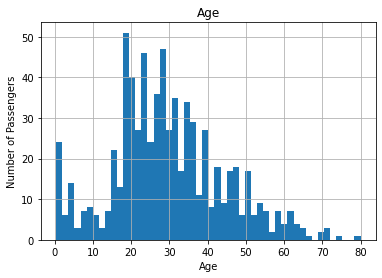

In [8]:
fig=df.Age.hist(bins=50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("Number of Passengers")


In [22]:
upper_bound=df['Age'].mean()+3*df['Age'].std()    # Data is 100% normal distrubution when data lies M-+3Sigma  
lower_bound=df['Age'].mean()-3*df['Age'].std()
print("upper_bound values:",upper_bound)
print("lower_bound values:",lower_bound)

upper_bound values: 73.27860964406095
lower_bound values: -13.88037434994331


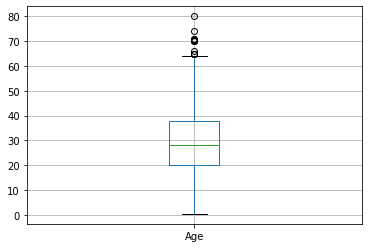

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
IQR=38.000000-20.125000
up_bound=IQR+(1.5*38.000000)
lw_bound= IQR-(1.5*20.125000)    ##Finding outlier boudaries   #Upper_bound=Q3+1.5(IQR)
print("Upper bount Outliers:",up_bound)
print("Lower bount Outliers:",lw_bound)

Upper bount Outliers: 74.875
Lower bount Outliers: -12.3125


## Feature is skewed

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

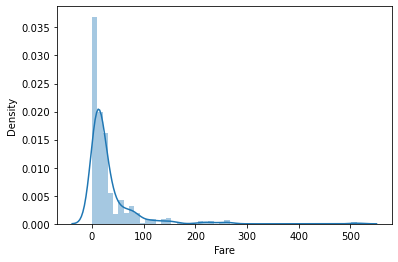

In [14]:
sns.distplot(df['Fare'])

<AxesSubplot:>

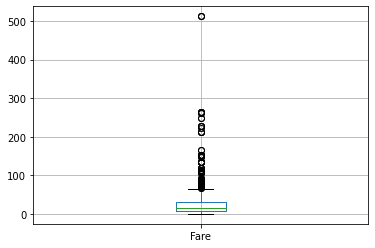

In [16]:
df.boxplot(column='Fare')

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
upper_bound1=df['Fare'].mean()+3*df['Fare'].std()    # Data is 100% normal distrubution when data lies M-+3Sigma  
lower_bound1=df['Fare'].mean()-3*df['Fare'].std()
print("upper_bound values:",upper_bound1)
print("lower_bound values:",lower_bound1)

upper_bound values: 181.2844937601173
lower_bound values: -116.87607782296811


In [31]:
IQR=df['Fare'].quantile(0.75)- df['Fare'].quantile(0.25)              ##Statistical IQR for Outliers
lw_bound=df['Fare'].quantile(0.25)-(IQR*1.5)
up_bound=df['Fare'].quantile(0.75)+(IQR*1.5)
print("Upper Bound: ",up_bound), print("Lower Bound: ",lw_bound)

Upper Bound:  65.6344
Lower Bound:  -26.724


(None, None)

In [32]:
data=df.copy()


In [33]:
data.loc[data['Age']>=74,"Age"]=74

In [35]:
data.head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
data.loc[data['Fare']>=65,"Fare"]=65

<AxesSubplot:>

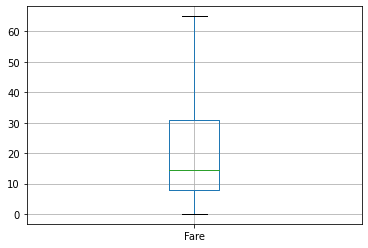

In [37]:
data.boxplot(column='Fare')    # No outlier Now

<AxesSubplot:>

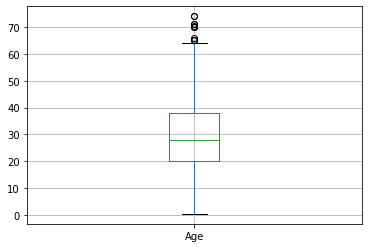

In [38]:
data.boxplot(column='Age')    # No outlier Now